In [2]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 76.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 23.7 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.25.6 which is incompatible.


In [4]:
# Upgrade NumPy to a compatible version (latest patch release for 2.0.x is recommended)
!pip install numpy==2.0.4 --upgrade

# Reinstall or upgrade Pandas
!pip install pandas --upgrade

ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement numpy==2.0.4 (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0.post2, 1.10.1, 1.10.2, 1.10.4, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 1.13.3, 1.14.0, 1.14.1, 1.14.2, 1.14.3, 1.14.4, 1.14.5, 1.14.6, 1.15.0, 1.15.1, 1.15.2, 1.15.3, 1.15.4, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.16.4, 1.16.5, 1.16.6, 1.17.0, 1.17.1, 1.17.2, 1.17.3, 1.17.4, 1.17.5, 1.18.0, 1.18.1, 1.18.2, 1.18.3, 1.18.4, 1.18.5, 1.19.0, 1.19.1, 1.19.2, 1.19.3, 1.19.4, 1.19.5, 1.20.0, 1.20.1, 1.20.2, 1.20.3, 1.21.0, 1.21.1, 1.22.0, 1.22.1, 1.22.2, 1.22.3, 1.22.4, 1.23.0, 1.23.1, 1.23.2, 1.23.3, 1.23.

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Import needed libraries and mount Google Drive
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
!pip install --upgrade mediapipe

Drive already mounted
Processing video: /content/drive/MyDrive/Camera Roll/Wrist_Extension_Strengthening_1/wrist_extension_strengthening_1_1.mp4
Processed 20/633 frames
Processed 30/633 frames
Processed 40/633 frames
Processed 50/633 frames
Processed 60/633 frames
Processed 70/633 frames
Processed 80/633 frames
Processed 90/633 frames
Processed 100/633 frames
Processed 110/633 frames
Processed 120/633 frames
Processed 130/633 frames
Processed 140/633 frames
Processed 170/633 frames
Processed 190/633 frames
Processed 200/633 frames
Processed 210/633 frames
Processed 220/633 frames
Processed 230/633 frames
Processed 240/633 frames
Processed 250/633 frames
Processed 260/633 frames
Processed 330/633 frames
Processed 340/633 frames
Processed 350/633 frames
Processed 360/633 frames
Processed 370/633 frames
Processed 380/633 frames
Processed 390/633 frames
Processed 400/633 frames
Processed 410/633 frames
Processed 420/633 frames
Processed 430/633 frames
Processed 440/633 frames
Processed 450

<ipython-input-9-fa55b8a17442>:453: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
<ipython-input-9-fa55b8a17442>:469: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Visualizations saved to output
Preparing LSTM data (primarily for right arm)...
LSTM data prepared with shape: (103, 10, 10)
Features used: 10
Data saved to output
Processing complete!


<ipython-input-9-fa55b8a17442>:671: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df[feature_cols].fillna(method='ffill').fillna(method='bfill')


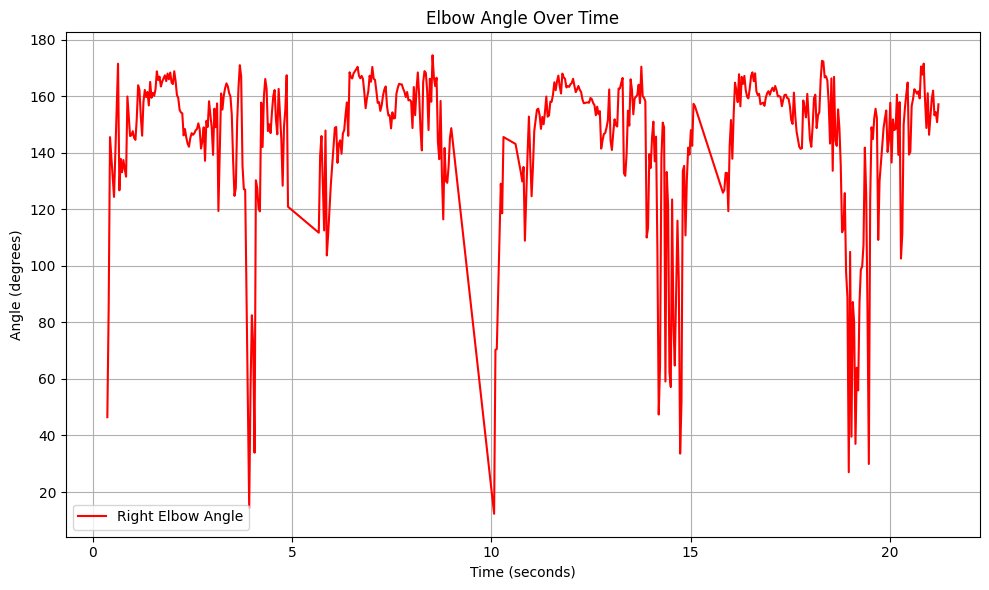

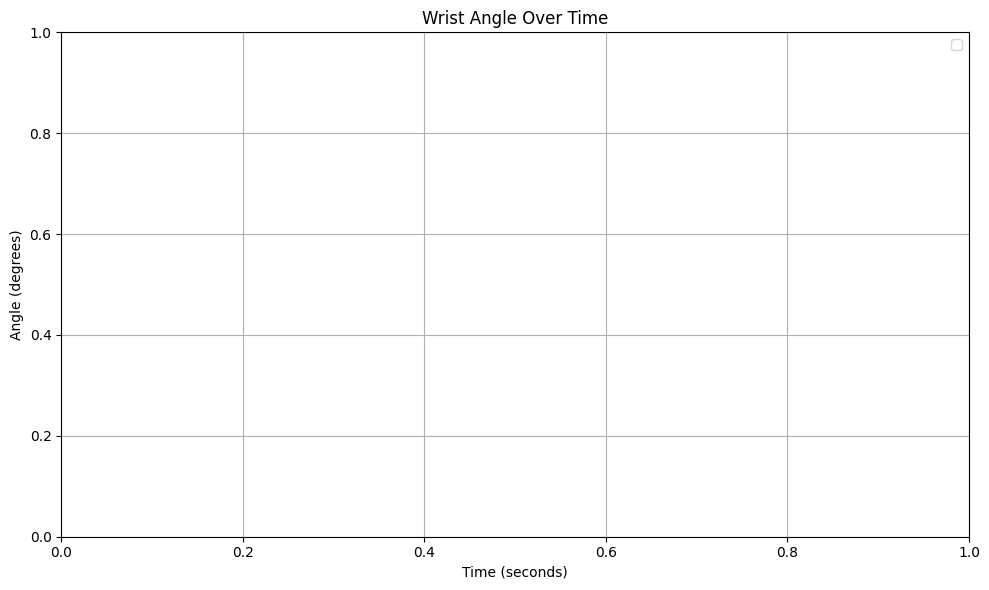

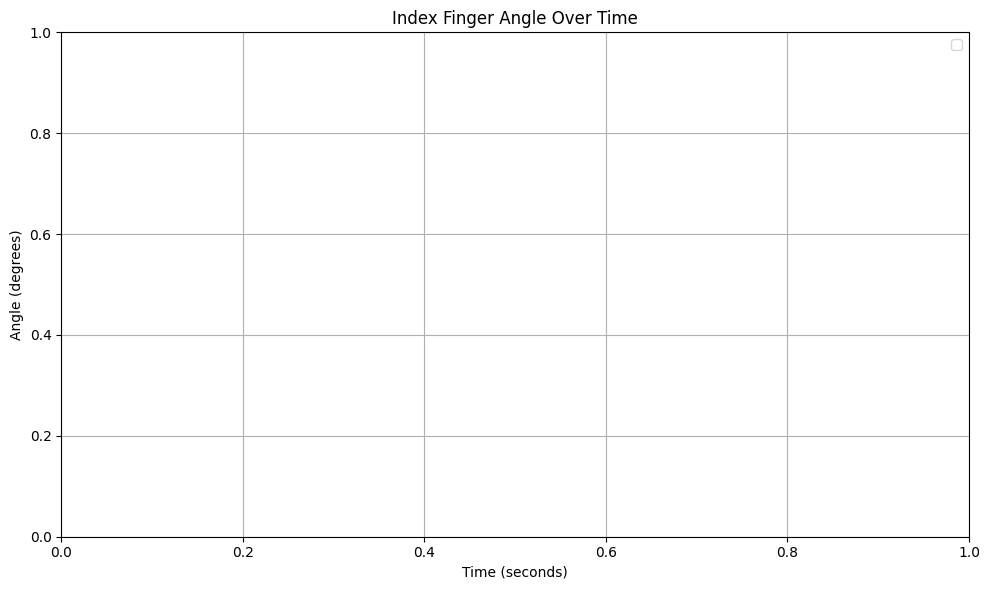

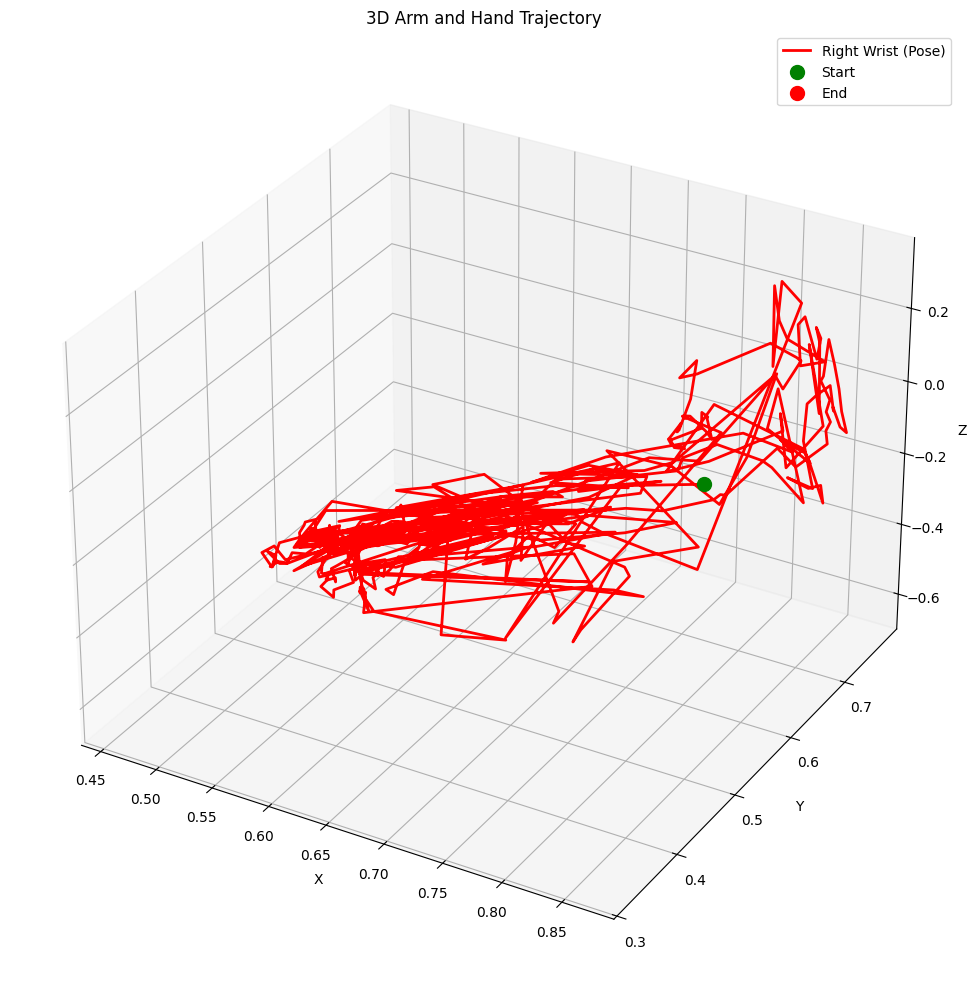

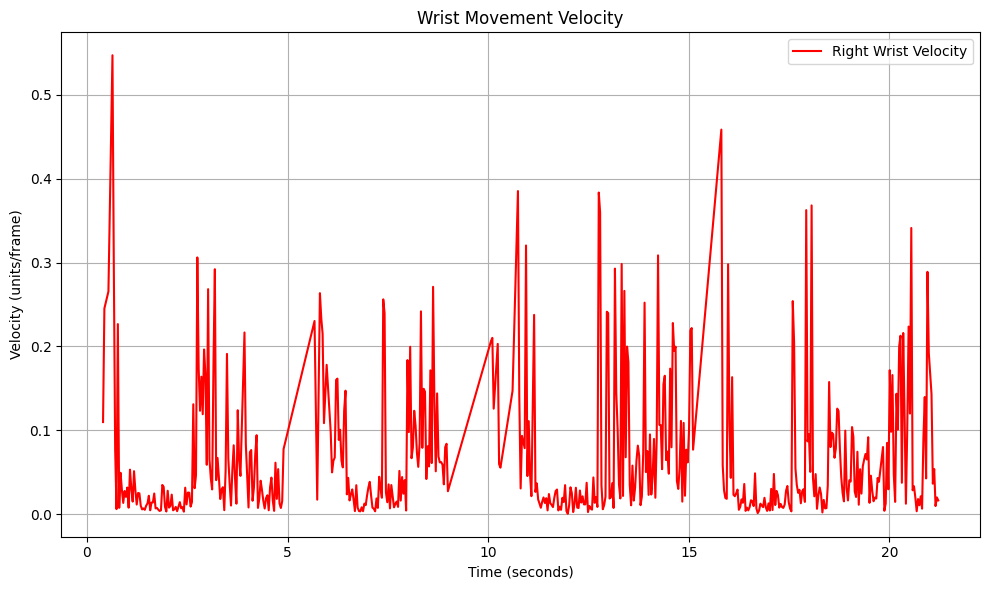

<Figure size 800x800 with 0 Axes>

In [9]:
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
import os
from google.colab import drive

# Mount Google Drive if not already mounted
try:
    drive_already_mounted = os.path.exists('/content/drive')
    if not drive_already_mounted:
        drive.mount('/content/drive')
        print("Drive mounted successfully")
    else:
        print("Drive already mounted")
except:
    print("Error mounting drive or drive already mounted")

# Define functions to calculate angles between joints
def calculate_angle(a, b, c):
    """
    Calculate the angle between three 3D points (in degrees)

    Args:
        a: First point [x, y, z]
        b: Middle point [x, y, z] (vertex of the angle)
        c: Last point [x, y, z]

    Returns:
        Angle in degrees
    """
    a = np.array(a)
    b = np.array(b)
    c = np.array(c)

    # Calculate vectors
    ba = a - b
    bc = c - b

    # Calculate dot product
    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))

    # Handle numerical errors
    cosine_angle = np.clip(cosine_angle, -1.0, 1.0)

    # Calculate angle in degrees
    angle = np.degrees(np.arccos(cosine_angle))

    return angle

def detect_dominant_arm(pose_landmarks, mp_pose):
    """
    Detects which arm is more visible/dominant in the frame

    Args:
        pose_landmarks: MediaPipe pose landmarks
        mp_pose: MediaPipe pose module

    Returns:
        "left", "right", or "both"
    """
    # Get visibility scores for key points on each arm
    landmarks = pose_landmarks.landmark

    left_vis = np.mean([
        landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER].visibility,
        landmarks[mp_pose.PoseLandmark.LEFT_ELBOW].visibility,
        landmarks[mp_pose.PoseLandmark.LEFT_WRIST].visibility
    ])

    right_vis = np.mean([
        landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER].visibility,
        landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW].visibility,
        landmarks[mp_pose.PoseLandmark.RIGHT_WRIST].visibility
    ])

    # Define thresholds for visibility
    threshold = 0.5
    high_threshold = 0.7

    # Return the most visible arm or both
    if left_vis > high_threshold and right_vis > high_threshold:
        return "both"
    elif left_vis > right_vis and left_vis > threshold:
        return "left"
    elif right_vis > left_vis and right_vis > threshold:
        return "right"
    else:
        # Default to the most visible one even if below threshold
        return "left" if left_vis > right_vis else "right"

def process_video(video_path, output_dir="output", min_detection_confidence=0.5, min_tracking_confidence=0.5, visualize=False):
    """
    Process video to extract upper limb landmarks using both MediaPipe Pose and Hands

    Args:
        video_path: Path to the video file
        output_dir: Directory to save output files
        min_detection_confidence: Minimum confidence for pose detection
        min_tracking_confidence: Minimum confidence for pose tracking
        visualize: Whether to visualize the landmarks on each frame

    Returns:
        DataFrame containing the extracted features
    """
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Initialize MediaPipe
    mp_pose = mp.solutions.pose
    mp_hands = mp.solutions.hands
    mp_drawing = mp.solutions.drawing_utils
    mp_drawing_styles = mp.solutions.drawing_styles

    # Open the video
    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Create a video writer for visualization if needed
    if visualize:
        output_video_path = os.path.join(output_dir, os.path.basename(video_path).replace('.mp4', '_processed.mp4'))
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

    # Initialize data storage
    all_data = []
    frame_count = 0

    # Track which arm is used most
    left_arm_frames = 0
    right_arm_frames = 0
    both_arms_frames = 0

    # Process the video using both Pose and Hands models
    with mp_pose.Pose(
        min_detection_confidence=min_detection_confidence,
        min_tracking_confidence=min_tracking_confidence,
        model_complexity=2) as pose, \
        mp_hands.Hands(
            min_detection_confidence=min_detection_confidence,
            min_tracking_confidence=min_tracking_confidence,
            model_complexity=1,
            max_num_hands=2) as hands:

        while cap.isOpened():
            success, image = cap.read()
            if not success:
                print(f"Processed {frame_count}/{total_frames} frames")
                break

            # Convert to RGB
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Process the image with Pose and Hands
            pose_results = pose.process(image_rgb)
            hands_results = hands.process(image_rgb)

            # Skip frame if no pose is detected
            if not pose_results.pose_landmarks:
                frame_count += 1
                if visualize:
                    out.write(image)
                continue

            # Get timestamp
            timestamp = frame_count / fps

            # Detect which arm is dominant in this frame
            dominant_arm = detect_dominant_arm(pose_results.pose_landmarks, mp_pose)

            # Update counters
            if dominant_arm == "left":
                left_arm_frames += 1
            elif dominant_arm == "right":
                right_arm_frames += 1
            else:
                both_arms_frames += 1

            # Initialize frame data
            frame_data = {
                'frame': frame_count,
                'timestamp': timestamp,
                'dominant_arm': dominant_arm
            }

            # Extract pose landmarks
            pose_landmarks = pose_results.pose_landmarks.landmark

            # Extract upper body landmarks based on dominant arm
            body_parts = [
                (mp_pose.PoseLandmark.LEFT_SHOULDER, "LEFT_SHOULDER"),
                (mp_pose.PoseLandmark.LEFT_ELBOW, "LEFT_ELBOW"),
                (mp_pose.PoseLandmark.LEFT_WRIST, "LEFT_WRIST"),
                (mp_pose.PoseLandmark.RIGHT_SHOULDER, "RIGHT_SHOULDER"),
                (mp_pose.PoseLandmark.RIGHT_ELBOW, "RIGHT_ELBOW"),
                (mp_pose.PoseLandmark.RIGHT_WRIST, "RIGHT_WRIST")
            ]

            # Add pose landmarks to frame data
            for landmark_idx, name in body_parts:
                landmark = pose_landmarks[landmark_idx]
                frame_data[f'{name}_x'] = landmark.x
                frame_data[f'{name}_y'] = landmark.y
                frame_data[f'{name}_z'] = landmark.z
                frame_data[f'{name}_vis'] = landmark.visibility

            # Calculate arm angles from pose data
            try:
                # Left elbow angle
                left_shoulder = [
                    pose_landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER].x,
                    pose_landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER].y,
                    pose_landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER].z
                ]
                left_elbow = [
                    pose_landmarks[mp_pose.PoseLandmark.LEFT_ELBOW].x,
                    pose_landmarks[mp_pose.PoseLandmark.LEFT_ELBOW].y,
                    pose_landmarks[mp_pose.PoseLandmark.LEFT_ELBOW].z
                ]
                left_wrist = [
                    pose_landmarks[mp_pose.PoseLandmark.LEFT_WRIST].x,
                    pose_landmarks[mp_pose.PoseLandmark.LEFT_WRIST].y,
                    pose_landmarks[mp_pose.PoseLandmark.LEFT_WRIST].z
                ]
                left_elbow_angle = calculate_angle(left_shoulder, left_elbow, left_wrist)
                frame_data['left_elbow_angle'] = left_elbow_angle

                # Right elbow angle
                right_shoulder = [
                    pose_landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER].x,
                    pose_landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER].y,
                    pose_landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER].z
                ]
                right_elbow = [
                    pose_landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW].x,
                    pose_landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW].y,
                    pose_landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW].z
                ]
                right_wrist = [
                    pose_landmarks[mp_pose.PoseLandmark.RIGHT_WRIST].x,
                    pose_landmarks[mp_pose.PoseLandmark.RIGHT_WRIST].y,
                    pose_landmarks[mp_pose.PoseLandmark.RIGHT_WRIST].z
                ]
                right_elbow_angle = calculate_angle(right_shoulder, right_elbow, right_wrist)
                frame_data['right_elbow_angle'] = right_elbow_angle

            except Exception as e:
                print(f"Error calculating pose angles: {e}")

            # Process hand landmarks if detected
            if hands_results.multi_hand_landmarks:
                # Get handedness (left or right hand)
                for idx, hand_landmarks in enumerate(hands_results.multi_hand_landmarks):
                    # Determine if this is a left or right hand
                    if idx < len(hands_results.multi_handedness):
                        handedness = hands_results.multi_handedness[idx].classification[0].label
                        handedness_confidence = hands_results.multi_handedness[idx].classification[0].score
                        hand_prefix = "LEFT" if handedness == "Left" else "RIGHT"

                        # Record hand detection confidence
                        frame_data[f'{hand_prefix}_HAND_confidence'] = handedness_confidence

                        # Extract all 21 hand landmarks
                        for landmark_idx, landmark in enumerate(hand_landmarks.landmark):
                            # Get the landmark name
                            landmark_name = mp_hands.HandLandmark(landmark_idx).name

                            # Store coordinates
                            frame_data[f'{hand_prefix}_HAND_{landmark_name}_x'] = landmark.x
                            frame_data[f'{hand_prefix}_HAND_{landmark_name}_y'] = landmark.y
                            frame_data[f'{hand_prefix}_HAND_{landmark_name}_z'] = landmark.z

                        # Calculate hand angles
                        try:
                            # Wrist to index finger MCP angle
                            wrist = [
                                hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].x,
                                hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].y,
                                hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].z
                            ]
                            index_mcp = [
                                hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].x,
                                hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].y,
                                hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].z
                            ]
                            index_pip = [
                                hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].x,
                                hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].y,
                                hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].z
                            ]

                            # Calculate index finger angle
                            index_angle = calculate_angle(wrist, index_mcp, index_pip)
                            frame_data[f'{hand_prefix}_index_finger_angle'] = index_angle

                            # Calculate angle between wrist and elbow using pose data
                            if hand_prefix == "LEFT" and 'LEFT_ELBOW_x' in frame_data:
                                pose_elbow = [
                                    frame_data['LEFT_ELBOW_x'],
                                    frame_data['LEFT_ELBOW_y'],
                                    frame_data['LEFT_ELBOW_z']
                                ]
                                pose_wrist = [
                                    frame_data['LEFT_WRIST_x'],
                                    frame_data['LEFT_WRIST_y'],
                                    frame_data['LEFT_WRIST_z']
                                ]
                                wrist_angle = calculate_angle(pose_elbow, pose_wrist, index_mcp)
                                frame_data['left_wrist_angle'] = wrist_angle

                            elif hand_prefix == "RIGHT" and 'RIGHT_ELBOW_x' in frame_data:
                                pose_elbow = [
                                    frame_data['RIGHT_ELBOW_x'],
                                    frame_data['RIGHT_ELBOW_y'],
                                    frame_data['RIGHT_ELBOW_z']
                                ]
                                pose_wrist = [
                                    frame_data['RIGHT_WRIST_x'],
                                    frame_data['RIGHT_WRIST_y'],
                                    frame_data['RIGHT_WRIST_z']
                                ]
                                wrist_angle = calculate_angle(pose_elbow, pose_wrist, index_mcp)
                                frame_data['right_wrist_angle'] = wrist_angle

                        except Exception as e:
                            print(f"Error calculating hand angles: {e}")

            # Store the frame data
            all_data.append(frame_data)

            # Draw landmarks for visualization
            if visualize:
                annotated_image = image.copy()

                # Draw pose landmarks
                mp_drawing.draw_landmarks(
                    annotated_image,
                    pose_results.pose_landmarks,
                    mp_pose.POSE_CONNECTIONS,
                    landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())

                # Draw hand landmarks
                if hands_results.multi_hand_landmarks:
                    for hand_landmarks in hands_results.multi_hand_landmarks:
                        mp_drawing.draw_landmarks(
                            annotated_image,
                            hand_landmarks,
                            mp_hands.HAND_CONNECTIONS,
                            mp_drawing_styles.get_default_hand_landmarks_style(),
                            mp_drawing_styles.get_default_hand_connections_style())

                # Add text for dominant arm
                cv2.putText(annotated_image, f"Arm: {dominant_arm}", (10, 30),
                          cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

                # Write to output video
                out.write(annotated_image)

            # Progress tracking
            frame_count += 1
            if frame_count % 10 == 0:
                print(f"Processed {frame_count}/{total_frames} frames")

    # Release resources
    cap.release()
    if visualize:
        out.release()

    # Convert to DataFrame
    df = pd.DataFrame(all_data)

    # Save to CSV
    output_csv = os.path.join(output_dir, os.path.basename(video_path).replace('.mp4', '_data.csv'))
    df.to_csv(output_csv, index=False)

    # Print summary
    print("\n===== Processing Summary =====")
    print(f"Total processed frames: {frame_count}")
    print(f"Left arm dominant: {left_arm_frames} frames ({100 * left_arm_frames / frame_count:.1f}%)")
    print(f"Right arm dominant: {right_arm_frames} frames ({100 * right_arm_frames / frame_count:.1f}%)")
    print(f"Both arms: {both_arms_frames} frames ({100 * both_arms_frames / frame_count:.1f}%)")

    # Check if hand landmarks were detected
    hand_columns = [col for col in df.columns if 'HAND' in col]
    if hand_columns:
        left_hand_detected = any('LEFT_HAND' in col for col in hand_columns)
        right_hand_detected = any('RIGHT_HAND' in col for col in hand_columns)
        print(f"Left hand detected: {'Yes' if left_hand_detected else 'No'}")
        print(f"Right hand detected: {'Yes' if right_hand_detected else 'No'}")
    else:
        print("No hand landmarks detected")

    print(f"Data saved to: {output_csv}")
    if visualize:
        print(f"Visualization saved to: {output_video_path}")
    print("=============================\n")

    return df

def visualize_limb_movement(df, output_dir="output", filename_prefix="limb_movement"):
    """
    Create visualizations of the limb movement data

    Args:
        df: DataFrame containing the processed data
        output_dir: Directory to save output visualizations
        filename_prefix: Prefix for output filenames
    """
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Determine which arm was most dominant through the video
    arm_counts = df['dominant_arm'].value_counts()
    most_frequent_arm = arm_counts.idxmax()

    print(f"Creating visualizations (primarily for {most_frequent_arm} arm)...")

    # Check if hand data is available
    hand_columns = [col for col in df.columns if 'HAND' in col]
    hand_data_available = len(hand_columns) > 0

    # 1. Elbow angle over time
    plt.figure(figsize=(10, 6))
    if 'left_elbow_angle' in df.columns and (most_frequent_arm == 'left' or most_frequent_arm == 'both'):
        plt.plot(df['timestamp'], df['left_elbow_angle'], label='Left Elbow Angle', color='blue')
    if 'right_elbow_angle' in df.columns and (most_frequent_arm == 'right' or most_frequent_arm == 'both'):
        plt.plot(df['timestamp'], df['right_elbow_angle'], label='Right Elbow Angle', color='red')

    plt.xlabel('Time (seconds)')
    plt.ylabel('Angle (degrees)')
    plt.title('Elbow Angle Over Time')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"{filename_prefix}_elbow_angle.png"))

    # 2. Wrist angle over time
    plt.figure(figsize=(10, 6))
    if 'left_wrist_angle' in df.columns and (most_frequent_arm == 'left' or most_frequent_arm == 'both'):
        plt.plot(df['timestamp'], df['left_wrist_angle'], label='Left Wrist Angle', color='blue')
    if 'right_wrist_angle' in df.columns and (most_frequent_arm == 'right' or most_frequent_arm == 'both'):
        plt.plot(df['timestamp'], df['right_wrist_angle'], label='Right Wrist Angle', color='red')

    plt.xlabel('Time (seconds)')
    plt.ylabel('Angle (degrees)')
    plt.title('Wrist Angle Over Time')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"{filename_prefix}_wrist_angle.png"))

    # 3. Finger angles if hand data is available
    if hand_data_available:
        plt.figure(figsize=(10, 6))
        if 'LEFT_index_finger_angle' in df.columns and (most_frequent_arm == 'left' or most_frequent_arm == 'both'):
            plt.plot(df['timestamp'], df['LEFT_index_finger_angle'], label='Left Index Finger Angle', color='blue')
        if 'RIGHT_index_finger_angle' in df.columns and (most_frequent_arm == 'right' or most_frequent_arm == 'both'):
            plt.plot(df['timestamp'], df['RIGHT_index_finger_angle'], label='Right Index Finger Angle', color='red')

        plt.xlabel('Time (seconds)')
        plt.ylabel('Angle (degrees)')
        plt.title('Index Finger Angle Over Time')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, f"{filename_prefix}_finger_angle.png"))

    # 4. 3D trajectory of wrist and hand
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Plot wrist movement from pose
    if most_frequent_arm == 'left' or most_frequent_arm == 'both':
        if all(col in df.columns for col in ['LEFT_WRIST_x', 'LEFT_WRIST_y', 'LEFT_WRIST_z']):
            ax.plot(df['LEFT_WRIST_x'], df['LEFT_WRIST_y'], df['LEFT_WRIST_z'], 'b-', linewidth=2, label='Left Wrist (Pose)')
            ax.scatter(df['LEFT_WRIST_x'].iloc[0], df['LEFT_WRIST_y'].iloc[0], df['LEFT_WRIST_z'].iloc[0],
                      c='g', marker='o', s=100, label='Start')
            ax.scatter(df['LEFT_WRIST_x'].iloc[-1], df['LEFT_WRIST_y'].iloc[-1], df['LEFT_WRIST_z'].iloc[-1],
                      c='r', marker='o', s=100, label='End')

    if most_frequent_arm == 'right' or most_frequent_arm == 'both':
        if all(col in df.columns for col in ['RIGHT_WRIST_x', 'RIGHT_WRIST_y', 'RIGHT_WRIST_z']):
            ax.plot(df['RIGHT_WRIST_x'], df['RIGHT_WRIST_y'], df['RIGHT_WRIST_z'], 'r-', linewidth=2, label='Right Wrist (Pose)')
            ax.scatter(df['RIGHT_WRIST_x'].iloc[0], df['RIGHT_WRIST_y'].iloc[0], df['RIGHT_WRIST_z'].iloc[0],
                      c='g', marker='o', s=100, label='Start')
            ax.scatter(df['RIGHT_WRIST_x'].iloc[-1], df['RIGHT_WRIST_y'].iloc[-1], df['RIGHT_WRIST_z'].iloc[-1],
                      c='r', marker='o', s=100, label='End')

    # Plot hand movement from hand tracking if available
    if hand_data_available:
        if most_frequent_arm == 'left' or most_frequent_arm == 'both':
            if all(col in df.columns for col in ['LEFT_HAND_WRIST_x', 'LEFT_HAND_WRIST_y', 'LEFT_HAND_WRIST_z']):
                ax.plot(df['LEFT_HAND_WRIST_x'], df['LEFT_HAND_WRIST_y'], df['LEFT_HAND_WRIST_z'],
                        'b--', linewidth=1, label='Left Wrist (Hand)')

        if most_frequent_arm == 'right' or most_frequent_arm == 'both':
            if all(col in df.columns for col in ['RIGHT_HAND_WRIST_x', 'RIGHT_HAND_WRIST_y', 'RIGHT_HAND_WRIST_z']):
                ax.plot(df['RIGHT_HAND_WRIST_x'], df['RIGHT_HAND_WRIST_y'], df['RIGHT_HAND_WRIST_z'],
                        'r--', linewidth=1, label='Right Wrist (Hand)')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Arm and Hand Trajectory')
    ax.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"{filename_prefix}_3d_trajectory.png"))

    # 5. Velocity of wrist movement
    plt.figure(figsize=(10, 6))

    # Calculate velocity for the primary arm
    if most_frequent_arm == 'left' or most_frequent_arm == 'both':
        if all(col in df.columns for col in ['LEFT_WRIST_x', 'LEFT_WRIST_y', 'LEFT_WRIST_z']):
            # Calculate velocity (simple difference between consecutive positions)
            vx = df['LEFT_WRIST_x'].diff()
            vy = df['LEFT_WRIST_y'].diff()
            vz = df['LEFT_WRIST_z'].diff()
            velocity = np.sqrt(vx**2 + vy**2 + vz**2)

            plt.plot(df['timestamp'][1:], velocity[1:], label='Left Wrist Velocity', color='blue')

    if most_frequent_arm == 'right' or most_frequent_arm == 'both':
        if all(col in df.columns for col in ['RIGHT_WRIST_x', 'RIGHT_WRIST_y', 'RIGHT_WRIST_z']):
            # Calculate velocity (simple difference between consecutive positions)
            vx = df['RIGHT_WRIST_x'].diff()
            vy = df['RIGHT_WRIST_y'].diff()
            vz = df['RIGHT_WRIST_z'].diff()
            velocity = np.sqrt(vx**2 + vy**2 + vz**2)

            plt.plot(df['timestamp'][1:], velocity[1:], label='Right Wrist Velocity', color='red')

    plt.xlabel('Time (seconds)')
    plt.ylabel('Velocity (units/frame)')
    plt.title('Wrist Movement Velocity')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"{filename_prefix}_wrist_velocity.png"))

    # 6. Hand pose visualization if hand data is available
    if hand_data_available:
        # Get a sample frame with good hand data
        sample_idx = df.index[df.filter(like='HAND').notna().any(axis=1)].tolist()
        if sample_idx:
            sample_frame = df.loc[sample_idx[len(sample_idx)//2]]

            # Create a 2D plot of the hand
            plt.figure(figsize=(8, 8))

            # Determine which hand to plot
            hand_to_plot = 'LEFT' if most_frequent_arm == 'left' else 'RIGHT'

            # Check if the selected hand is available
            if any(hand_to_plot in col for col in df.columns):
                # Get hand landmarks
                hand_x = [sample_frame[f'{hand_to_plot}_HAND_{landmark}_x']
                         for landmark in ['WRIST', 'THUMB_TIP', 'INDEX_FINGER_TIP',
                                         'MIDDLE_FINGER_TIP', 'RING_FINGER_TIP', 'PINKY_TIP']
                         if f'{hand_to_plot}_HAND_{landmark}_x' in sample_frame]

                hand_y = [sample_frame[f'{hand_to_plot}_HAND_{landmark}_y']
                         for landmark in ['WRIST', 'THUMB_TIP', 'INDEX_FINGER_TIP',
                                         'MIDDLE_FINGER_TIP', 'RING_FINGER_TIP', 'PINKY_TIP']
                         if f'{hand_to_plot}_HAND_{landmark}_y' in sample_frame]

                # Plot if we have data
                if hand_x and hand_y:
                    plt.scatter(hand_x, hand_y, c='blue', s=100)

                    # Add labels
                    landmarks = ['WRIST', 'THUMB_TIP', 'INDEX_FINGER_TIP',
                               'MIDDLE_FINGER_TIP', 'RING_FINGER_TIP', 'PINKY_TIP']

                    for i, landmark in enumerate(landmarks):
                        if f'{hand_to_plot}_HAND_{landmark}_x' in sample_frame:
                            plt.annotate(landmark,
                                       (sample_frame[f'{hand_to_plot}_HAND_{landmark}_x'],
                                        sample_frame[f'{hand_to_plot}_HAND_{landmark}_y']),
                                       fontsize=8)

                    plt.title(f'{hand_to_plot} Hand Landmarks (Sample Frame)')
                    plt.gca().invert_yaxis()  # Invert Y axis for more intuitive view
                    plt.axis('equal')
                    plt.grid(True)
                    plt.tight_layout()
                    plt.savefig(os.path.join(output_dir, f"{filename_prefix}_hand_landmarks.png"))

    print(f"Visualizations saved to {output_dir}")

def prepare_data_for_lstm(df, output_dir="output", filename_prefix="lstm_data", window_size=10, step_size=5):
    """
    Prepare the data for LSTM training by creating sequences

    Args:
        df: DataFrame containing the processed data
        output_dir: Directory to save output files
        filename_prefix: Prefix for output filenames
        window_size: Size of the sliding window for creating sequences
        step_size: Step size for the sliding window

    Returns:
        X: Input sequences for LSTM
        timestamps: Corresponding timestamps for each sequence
    """
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Determine which arm was most dominant
    arm_counts = df['dominant_arm'].value_counts()
    most_frequent_arm = arm_counts.idxmax()
    print(f"Preparing LSTM data (primarily for {most_frequent_arm} arm)...")

    # Check if hand data is available
    hand_columns = [col for col in df.columns if 'HAND' in col]
    hand_data_available = len(hand_columns) > 0

    # Select features based on the dominant arm
    feature_cols = []

    # Add pose landmarks
    if most_frequent_arm == 'left' or most_frequent_arm == 'both':
        pose_prefix = 'LEFT_'
    else:
        pose_prefix = 'RIGHT_'

    # Add coordinate columns for the pose joints
    for joint in ['SHOULDER', 'ELBOW', 'WRIST']:
        for coord in ['x', 'y', 'z']:
            col = f"{pose_prefix}{joint}_{coord}"
            if col in df.columns:
                feature_cols.append(col)

    # Add hand landmarks if available
    if hand_data_available:
        hand_prefix = 'LEFT_HAND' if most_frequent_arm == 'left' else 'RIGHT_HAND'

        # Check if the preferred hand is available
        if any(hand_prefix in col for col in df.columns):
            # Add key hand landmarks
            for landmark in ['WRIST', 'THUMB_TIP', 'INDEX_FINGER_TIP', 'MIDDLE_FINGER_TIP']:
                for coord in ['x', 'y', 'z']:
                    col = f"{hand_prefix}_{landmark}_{coord}"
                    if col in df.columns:
                        feature_cols.append(col)

    # Add angle columns
    if most_frequent_arm == 'left' or most_frequent_arm == 'both':
        if 'left_elbow_angle' in df.columns:
            feature_cols.append('left_elbow_angle')
        if 'left_wrist_angle' in df.columns:
            feature_cols.append('left_wrist_angle')
        if 'LEFT_index_finger_angle' in df.columns:
            feature_cols.append('LEFT_index_finger_angle')
    else:
        if 'right_elbow_angle' in df.columns:
            feature_cols.append('right_elbow_angle')
        if 'right_wrist_angle' in df.columns:
            feature_cols.append('right_wrist_angle')
        if 'RIGHT_index_finger_angle' in df.columns:
            feature_cols.append('RIGHT_index_finger_angle')

    # Handle missing values - important for combining pose and hand data
    # Fill missing values with forward and backward fill
    df_filled = df[feature_cols].fillna(method='ffill').fillna(method='bfill')

    # If still have NaNs (e.g., at the beginning or end), replace with zeros
    df_filled = df_filled.fillna(0)

    # Create sequences for LSTM
    X = []
    timestamps = []

    # Create sequences using sliding window
    for i in range(0, len(df_filled) - window_size, step_size):
        X.append(df_filled.iloc[i:i+window_size].values)
        timestamps.append(df['timestamp'].iloc[i+window_size-1])

    # Convert to numpy arrays
    X = np.array(X)
    timestamps = np.array(timestamps)

    # Save to files
    np.save(os.path.join(output_dir, f"{filename_prefix}_X.npy"), X)
    np.save(os.path.join(output_dir, f"{filename_prefix}_timestamps.npy"), timestamps)

    # Also save the feature column names for reference
    with open(os.path.join(output_dir, f"{filename_prefix}_features.txt"), 'w') as f:
        for col in feature_cols:
            f.write(f"{col}\n")

    print(f"LSTM data prepared with shape: {X.shape}")
    print(f"Features used: {len(feature_cols)}")
    print(f"Data saved to {output_dir}")

    return X, timestamps

# Main execution function
def process_and_visualize(video_path, output_dir="output", visualize=True, prepare_lstm_data=True):
    """
    Main function to process the video, visualize the data, and prepare for LSTM

    Args:
        video_path: Path to the video file
        output_dir: Directory to save output files
        visualize: Whether to create the visualization video and plots
        prepare_lstm_data: Whether to prepare data for LSTM
    """
    print(f"Processing video: {video_path}")

    # Create output directory
    os.makedirs(output_dir, exist_ok=True)

    # Process the video
    df = process_video(video_path, output_dir=output_dir, visualize=visualize)

    # Create visualizations
    if visualize:
        visualize_limb_movement(df, output_dir=output_dir,
                               filename_prefix=os.path.basename(video_path).replace('.mp4', ''))

    # Prepare data for LSTM if requested
    if prepare_lstm_data:
        X, timestamps = prepare_data_for_lstm(df, output_dir=output_dir,
                                            filename_prefix=os.path.basename(video_path).replace('.mp4', ''))

    print("Processing complete!")
    return df

# Example usage
if __name__ == "__main__":
    # Replace with your actual video path
    video_path = "/content/drive/MyDrive/Camera Roll/Wrist_Extension_Strengthening_1/wrist_extension_strengthening_1_1.mp4"
    df = process_and_visualize(video_path, output_dir="output", visualize=True, prepare_lstm_data=True)

In [10]:
# Preview the data
df.head()

# See what columns are available
print(df.columns.tolist())

['frame', 'timestamp', 'dominant_arm', 'LEFT_SHOULDER_x', 'LEFT_SHOULDER_y', 'LEFT_SHOULDER_z', 'LEFT_SHOULDER_vis', 'LEFT_ELBOW_x', 'LEFT_ELBOW_y', 'LEFT_ELBOW_z', 'LEFT_ELBOW_vis', 'LEFT_WRIST_x', 'LEFT_WRIST_y', 'LEFT_WRIST_z', 'LEFT_WRIST_vis', 'RIGHT_SHOULDER_x', 'RIGHT_SHOULDER_y', 'RIGHT_SHOULDER_z', 'RIGHT_SHOULDER_vis', 'RIGHT_ELBOW_x', 'RIGHT_ELBOW_y', 'RIGHT_ELBOW_z', 'RIGHT_ELBOW_vis', 'RIGHT_WRIST_x', 'RIGHT_WRIST_y', 'RIGHT_WRIST_z', 'RIGHT_WRIST_vis', 'left_elbow_angle', 'right_elbow_angle', 'LEFT_HAND_confidence', 'LEFT_HAND_WRIST_x', 'LEFT_HAND_WRIST_y', 'LEFT_HAND_WRIST_z', 'LEFT_HAND_THUMB_CMC_x', 'LEFT_HAND_THUMB_CMC_y', 'LEFT_HAND_THUMB_CMC_z', 'LEFT_HAND_THUMB_MCP_x', 'LEFT_HAND_THUMB_MCP_y', 'LEFT_HAND_THUMB_MCP_z', 'LEFT_HAND_THUMB_IP_x', 'LEFT_HAND_THUMB_IP_y', 'LEFT_HAND_THUMB_IP_z', 'LEFT_HAND_THUMB_TIP_x', 'LEFT_HAND_THUMB_TIP_y', 'LEFT_HAND_THUMB_TIP_z', 'LEFT_HAND_INDEX_FINGER_MCP_x', 'LEFT_HAND_INDEX_FINGER_MCP_y', 'LEFT_HAND_INDEX_FINGER_MCP_z', 'LEFT_HA